In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('solar-flare.csv', sep=' ', header=None, skiprows=1, names=['class','largest_spot', 'spot_distribution','activity', 'evolution', 'previous_activity',
            'historically_complex', 'new_historically_complex', 'area', 'largest_area','C','M','X'])

### 1 - Atividade

In [3]:
df.head(5)

,class,largest_spot,spot_distribution,activity,evolution,previous_activity,historically_complex,new_historically_complex,area,largest_area,C,M,X
0,H,A,X,1,3,1,1,1,1,1,0,0,0
1,D,R,O,1,3,1,1,2,1,1,0,0,0
2,C,S,O,1,3,1,1,2,1,1,0,0,0
3,H,R,X,1,2,1,1,1,1,1,0,0,0
4,H,S,X,1,1,1,1,2,1,1,0,0,0


In [4]:
df.head(-5)

,class,largest_spot,spot_distribution,activity,evolution,previous_activity,historically_complex,new_historically_complex,area,largest_area,C,M,X
0,H,A,X,1,3,1,1,1,1,1,0,0,0
1,D,R,O,1,3,1,1,2,1,1,0,0,0
2,C,S,O,1,3,1,1,2,1,1,0,0,0
3,H,R,X,1,2,1,1,1,1,1,0,0,0
4,H,S,X,1,1,1,1,2,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1056,H,S,X,1,2,1,1,2,1,1,1,0,0
1057,D,S,O,1,2,1,2,2,1,1,0,0,0
1058,H,S,X,1,2,2,2,2,1,1,0,0,0
1059,H,S,X,2,2,1,1,2,1,1,0,0,0


In [5]:
df.tail(5)

,class,largest_spot,spot_distribution,activity,evolution,previous_activity,historically_complex,new_historically_complex,area,largest_area,C,M,X
1061,H,S,X,1,2,1,1,1,1,1,0,0,0
1062,H,S,X,2,2,1,1,2,1,1,0,0,0
1063,C,S,O,1,2,1,2,2,1,1,0,0,0
1064,H,R,X,1,2,1,1,2,1,1,0,0,0
1065,B,X,O,1,1,1,1,2,1,1,0,0,0


### 2 - Atividade

In [6]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [7]:
onehotencoder = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [0,1,2])], remainder='passthrough')
# 1- A,B,C,D,E,F,H
# 2- X,R,S,A,H,K
# 3- X,O,I,C

In [8]:
df_novo = pd.DataFrame(onehotencoder.fit_transform(df))

In [9]:
df_novo.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,3.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,3.0,1.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,3.0,1.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0


### 3 - Atividade

In [10]:
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()

In [11]:
targets = df_novo.iloc[:, 23:26]
X = df_novo.iloc[:, 0:23]

In [12]:
targets.head()

,23,24,25
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0


In [13]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,3.0,1.0,1.0,2.0,1.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,3.0,1.0,1.0,2.0,1.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0


In [14]:
df_norm = SC.fit_transform(X)

In [15]:
df_norm

array([[-0.39994559, -0.49677321, -0.53758383, ..., -2.64859162,
        -0.16120337,  0.        ],
       [-0.39994559, -0.49677321,  1.860175  , ...,  0.37755915,
        -0.16120337,  0.        ],
       [-0.39994559,  2.01299098, -0.53758383, ...,  0.37755915,
        -0.16120337,  0.        ],
       ...,
       [-0.39994559,  2.01299098, -0.53758383, ...,  0.37755915,
        -0.16120337,  0.        ],
       [-0.39994559, -0.49677321, -0.53758383, ...,  0.37755915,
        -0.16120337,  0.        ],
       [ 2.50034011, -0.49677321, -0.53758383, ...,  0.37755915,
        -0.16120337,  0.        ]])

### 4 - Atividade

In [17]:
from sklearn.decomposition import PCA
import matplotlib
import matplotlib.pyplot as plt

In [18]:
pca = PCA(n_components=0.9)

In [19]:
df_pca = pca.fit_transform(df_norm)

In [20]:
print("Dados originais ", df_norm.shape)
print("Dados reduzudos ", df_pca.shape)
print("Dados reduzudos ", pca.n_components_)

Dados originais  (1066, 23)
Dados reduzudos  (1066, 13)
Dados reduzudos  13


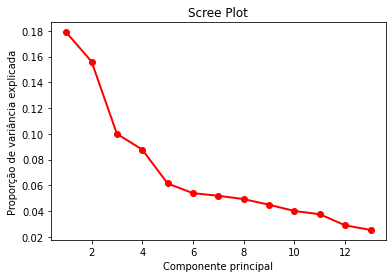

In [21]:

PC = np.arange(pca.n_components_) + 1
plt.plot(PC, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Componente principal')
plt.ylabel('Proporção de variância explicada')
plt.show()

In [22]:
pca_90 = PCA(n_components = pca.n_components_)
df_pca_90 = pca_90.fit_transform(df_pca)


In [23]:
print("Dados originais ", df_pca.shape)
print("Dados reduzudos ", df_pca_90.shape)


Dados originais  (1066, 13)
Dados reduzudos  (1066, 13)
